# Conversor de Atitudes Estruturais de Feições Planares: Brunton para Clar

Este código é uma ferramenta que transforma medidas de atitudes geológicas do
sistema Brunton para o sistema Clar. Ele permite que o usuário insira dados de Dip Direction (Direção da Estrutura ou Direção de Inclinação) e Dip (Mergulho da Estrutura ou Inclinação) no formato "Direção da Estrutura / Mergulho da Estrutura" (exemplo: N35E/25NW). O código então converte essas informações para o formato Clar, ajustando o azimute e o ângulo de mergulho conforme as direções especificadas. A entrada é validada, e os resultados da conversão são exportados para arquivos nos formatos .xlsx, .csv e .txt, facilitando o armazenamento e o uso dos dados.

Exemplos:	a) N35E/25NW = 305/25 - b) N35E/25SE = 125/25 - c) N35W/25NE = 055/25 - d) N35W/25SW = 235/25

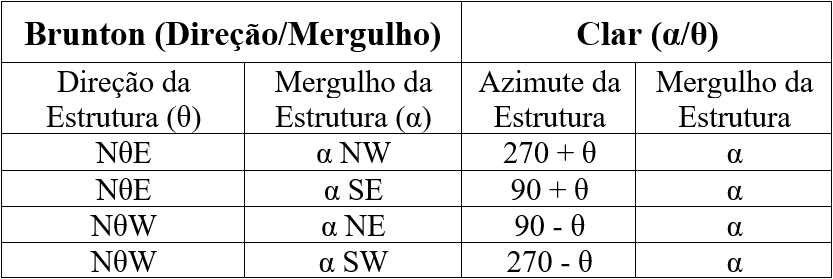

O código foi baseado na tabela acima, que descreve a conversão de medidas geológicas entre os sistemas Brunton e Clar. Na tabela, são apresentados os ajustes no azimute para diferentes direções de mergulho (NW, SE, NE e SW), e o código segue essas relações para realizar as transformações corretamente, garantindo que o azimute e o mergulho sejam ajustados de acordo com as direções fornecidas.

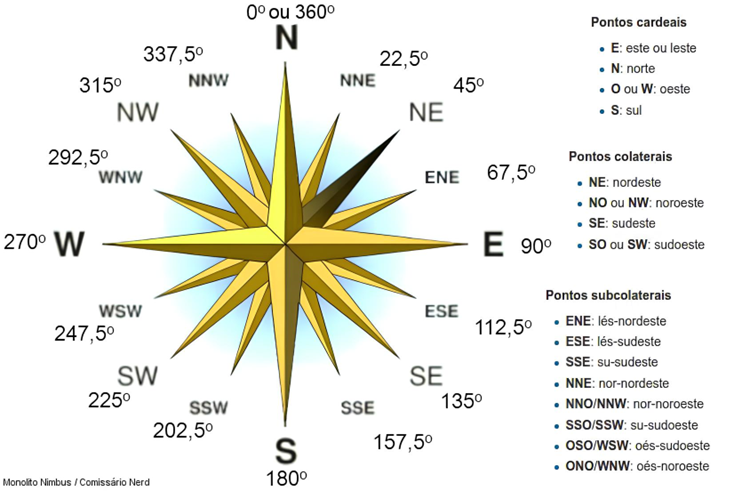



---



In [47]:
# Importar as bibliotecas necessárias
import pandas as pd
from IPython.display import display
import ipywidgets as widgets
from google.colab import files
import re

# Função de conversão de Brunton para Clar
def brunton_to_clar(direction, dip, dip_direction):
    # Calcular azimute com base na direção e no dip_direction
    if dip_direction == 'NW':
        azimuth = 270 + direction
    elif dip_direction == 'SE':
        azimuth = 90 + direction
    elif dip_direction == 'NE':
        azimuth = 90 - direction
    elif dip_direction == 'SW':
        azimuth = 270 - direction
    else:
        raise ValueError("Direção de mergulho inválida. Use 'NW', 'SE', 'NE' ou 'SW'.")

    # Ajustar azimute para garantir que esteja no intervalo de 0 a 360 graus
    azimuth = azimuth % 360

    return azimuth, dip

# Função para validar o formato da entrada
def validate_input(input_data):
    # Verificar se o formato está correto (exemplo: N35E/25NW)
    valid_format = re.match(r'^[A-Z]{1}[0-9]{2}[A-Z]{1}/[0-9]{2}[A-Z]{2}$', input_data)
    if not valid_format:
        return False
    return True

# Função para transformar os dados de um DataFrame
def transform_dataframe(df):
    results = []
    for index, row in df.iterrows():
        direction = int(row['Direction'][1:-1])
        dip = int(row['Dip'][:-2])
        dip_direction = row['Dip'][-2:]
        azimuth, new_dip = brunton_to_clar(direction, dip, dip_direction)
        # Formatar a saída conforme solicitado: Direção de Mergulho e Mergulho separados por espaço
        results.append([azimuth, new_dip])

    return results

# Função para processar a entrada do usuário
def process_input(input_data):
    # Criar uma lista de dicionários a partir da entrada do usuário
    data = []
    for line in input_data.split('\n'):
        if line.strip():
            # Agora, sem espaços, esperamos uma entrada como 'N35E/25NW'
            direction_dip = line.split('/')
            if len(direction_dip) == 2:
                direction, dip = direction_dip
                data.append({'Direction': direction.strip(), 'Dip': dip.strip()})

    # Criar DataFrame
    df = pd.DataFrame(data)

    # Transformar os dados de Brunton para Clar
    result = transform_dataframe(df)

    # Salvar os resultados nos formatos solicitados

    # .xlsx - Salvar como planilha
    xlsx_filename = 'Medidas_Brunton_para_Clar.xlsx'
    xlsx_df = pd.DataFrame(result, columns=['Dip Direction', 'Dip'])
    xlsx_df.to_excel(xlsx_filename, index=False)

    # .csv - Salvar como CSV
    csv_filename = 'Medidas_Brunton_para_Clar.csv'
    csv_df = pd.DataFrame(result, columns=['Dip Direction', 'Dip'])
    csv_df.to_csv(csv_filename, index=False)

    # .txt - Salvar como texto
    txt_filename = 'Medidas_Brunton_para_Clar.txt'
    with open(txt_filename, 'w') as f:
        for azimuth, dip in result:
            f.write(f"{azimuth} {dip}\n")

    # Exibir o resultado
    print("Dados transformados de Brunton para Clar (Direção do Mergulho e Mergulho):")
    for azimuth, dip in result:
        print(f"{azimuth} {dip}")

    # Retornar os nomes dos arquivos para download
    return xlsx_filename, csv_filename, txt_filename

# Criar o widget para entrada de texto
input_text = widgets.Textarea(
    value='N35E/25NW\nN35E/25SE\nN35W/25NE\nN35W/25SW',
    placeholder='Exemplo: N35E/25NW',
    description='Medidas:',
    layout=widgets.Layout(width='60%', height='200px', font_size='16px')
)

# Exibir uma mensagem explicativa sobre o formato
instruction_label = widgets.Label(value="Por favor, insira as medidas no formato: N35E/25NW (Direção da Estrutura / Mergulho da Estrutura).")

# Label para mostrar a mensagem de erro
error_label = widgets.Label(value="")
error_label.style = {'color': 'red'}

# Botões para download com ícones e cores mais escuras
xlsx_button = widgets.Button(description='Baixar .xlsx', disabled=True, icon='download', style={'button_color': '#2196F3'})
csv_button = widgets.Button(description='Baixar .csv', disabled=True, icon='download', style={'button_color': '#2196F3'})
txt_button = widgets.Button(description='Baixar .txt', disabled=True, icon='download', style={'button_color': '#2196F3'})

# Função de callback para o botão de processar
def on_process_button_click(b):
    input_data = input_text.value

    # Verificar se o formato de entrada está correto
    invalid_lines = [line for line in input_data.split('\n') if line.strip() and not validate_input(line.strip())]

    if invalid_lines:
        error_label.value = f"Erro: O formato de entrada está incorreto. Verifique as linhas: {', '.join(invalid_lines)}."
        return
    else:
        error_label.value = ""  # Limpar a mensagem de erro, se a entrada estiver correta

    # Processar os dados se a validação for bem-sucedida
    xlsx_filename, csv_filename, txt_filename = process_input(input_data)

    # Atualizar os botões de download com os arquivos gerados
    xlsx_button.output_filename = xlsx_filename
    csv_button.output_filename = csv_filename
    txt_button.output_filename = txt_filename

    # Habilitar os botões de download
    xlsx_button.disabled = False
    csv_button.disabled = False
    txt_button.disabled = False

# Função de callback para o botão de download .xlsx
def on_xlsx_download_button_click(b):
    files.download(b.output_filename)

# Função de callback para o botão de download .csv
def on_csv_download_button_click(b):
    files.download(b.output_filename)

# Função de callback para o botão de download .txt
def on_txt_download_button_click(b):
    files.download(b.output_filename)

# Função de callback para o botão de limpar entrada com ícone e cor escura
clear_button = widgets.Button(description="Limpar Entrada", icon='trash', style={'button_color': '#F44336'})

def on_clear_button_click(b):
    input_text.value = ''  # Limpar o campo de texto
    error_label.value = ''  # Limpar mensagem de erro
    xlsx_button.disabled = True  # Desabilitar os botões de download
    csv_button.disabled = True
    txt_button.disabled = True

# Estilizar o botão de processar com cor mais escura
process_button = widgets.Button(description='Processar', style={'button_color': '#4CAF50'})

# Conectar as funções de callback aos botões
process_button.on_click(on_process_button_click)

xlsx_button.on_click(on_xlsx_download_button_click)
csv_button.on_click(on_csv_download_button_click)
txt_button.on_click(on_txt_download_button_click)
clear_button.on_click(on_clear_button_click)

# Exibir os widgets com destaques visuais
display(instruction_label, input_text, error_label, process_button, xlsx_button, csv_button, txt_button, clear_button)

Label(value='Por favor, insira as medidas no formato: N35E/25NW (Direção da Estrutura / Mergulho da Estrutura)…

Textarea(value='N35E/25NW\nN35E/25SE\nN35W/25NE\nN35W/25SW', description='Medidas:', layout=Layout(height='200…

Label(value='')

Button(description='Processar', style=ButtonStyle(button_color='#4CAF50'))

Button(description='Baixar .xlsx', disabled=True, icon='download', style=ButtonStyle(button_color='#2196F3'))

Button(description='Baixar .csv', disabled=True, icon='download', style=ButtonStyle(button_color='#2196F3'))

Button(description='Baixar .txt', disabled=True, icon='download', style=ButtonStyle(button_color='#2196F3'))

Button(description='Limpar Entrada', icon='trash', style=ButtonStyle(button_color='#F44336'))

Dados transformados de Brunton para Clar (Direção do Mergulho e Mergulho):
305 25
125 25
55 25
235 25
